## <span style="color:darkblue"> Problem Set 3: Data Analysis Part II

Stat140: Introduction to the Ideas and Applications of Statistics 


*You are encouraged to discuss problems with other students (and, of course, with the course head and the TAs), but you must write your final answer in your own words. Solutions prepared "in committee" are not acceptable. If you do collaborate with classmates on a problem, please list your collaborators on your solution.*

#### Background information 

In the United States, individuals with developmental disabilities typically receive services and support from state governments. The State of California allocates funds to developmentally-disabled residents through the California Department of Developmental Services (DDS); individuals receiving DDS funds are referred to as 'consumers'. The dataset \texttt{dds.discr} represents a sample of 1,000 DDS consumers (out of a total population of approximately 250,000), and includes information about age, gender, ethnicity, and the amount of financial support per consumer provided by the DDS. The dataset is available in the \texttt{oibiostat} package.

A team of researchers examined the mean annual expenditure on consumers by ethnicity, and found that the mean annual expenditures on Hispanic consumers was approximately one-third of the mean expenditures on White non-Hispanic consumers. As a result, an allegation of ethnic discrimination was brought against the California DDS.

Does this finding represent sufficient evidence of ethnic discrimination, or might there be more to the story? This lab provides a walkthrough to conducting an exploratory analysis that not only investigates the relationship between two variables of interest, but also considers whether other variables might be influencing that relationship.

# PART II: Relationships between two variables

After examining variables individually, we now need to explore how variables are related to each other. For this case study, the response variable is `expenditures`, the amount of funds the California DDS allocates annually to each consumer. We the possible explanations in the data are `age`, `age.cohort`, `ethnicity`, and `gender`. 



## Problem 1: Expenditure vs Age

How do annual expenditures vary by age? (a) Use the appropriate plot to compare `expenditures` and `age`. (b) Explain trends in the data. (c) Explain implications for our situtation.


#### Solution:

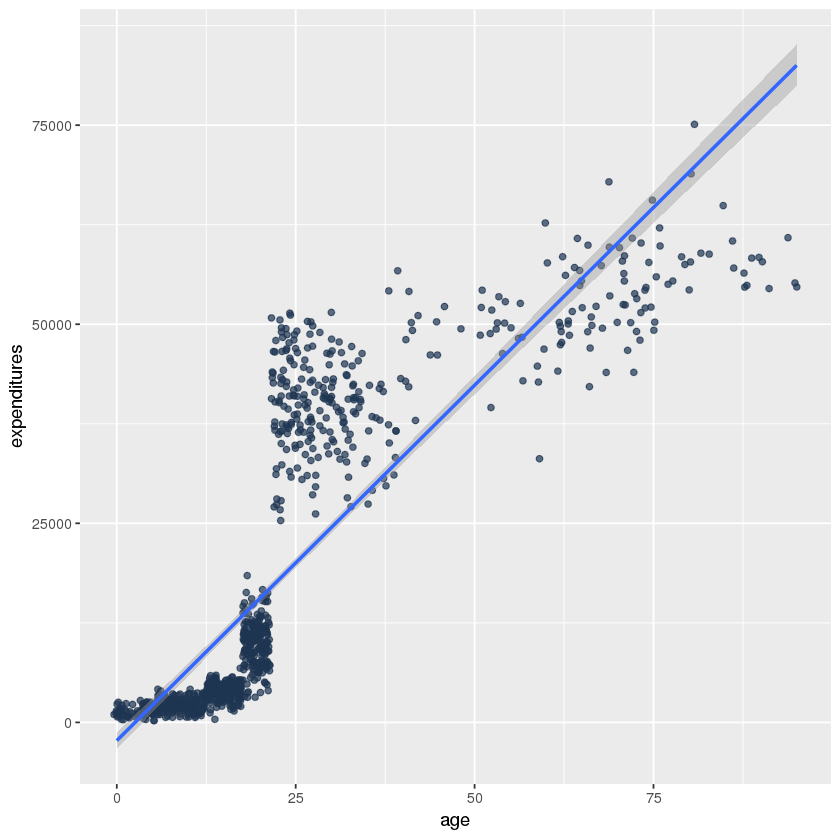

In [6]:
# Scatter Plot
require(oibiostat)
data(dds.discr)
require(ggplot2)
ggplot(data=dds.discr,aes(x=age, y=expenditures))+
    geom_point(fill = "#4271AE", colour = "#1F3552", alpha = 0.7,position='jitter')+
    geom_smooth(method=lm)

In [42]:
dds.discr %>% 
    group_by(age.cohort) %>%
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

age.cohort,min,max,q1,q3,mean,median
0-5,222,2750,1034.25,1739.25,1415.280,1380.5
6-12,620,4163,1601.50,2846.50,2226.863,2191.0
13-17,386,6798,3306.50,4665.50,3922.613,3952.0
18-21,3153,18435,7588.00,11806.50,9888.538,9979.0
22-50,25348,56716,36447.25,44720.75,40209.283,40455.5
51+,33110,75098,49515.00,57745.50,53521.896,53509.0


Answer (b): There is a clear upward trend in expenditures as age increases; older individuals tend to receive more DDS funds.  If the data included only individuals from one age cohort, such as the 18-21 year cohort, the distribution would be less variable, and range between \$3,000 and \$20,000 rather than \$0 and \$75,000.


Answer (c): The upward trend reflects the underlying context of the data. The purpose of providing funds to developmentally disabled individuals is to help them maintain a quality of life similar to those without disabilities; as individuals age, it is expected that their financial needs will increase.

### Problem 2

Do annual expenditures seem to vary by gender? (a) Make a plot, (b) Explain how expenditures vary. (c) How does this relate to our current situation.

#### Solution:

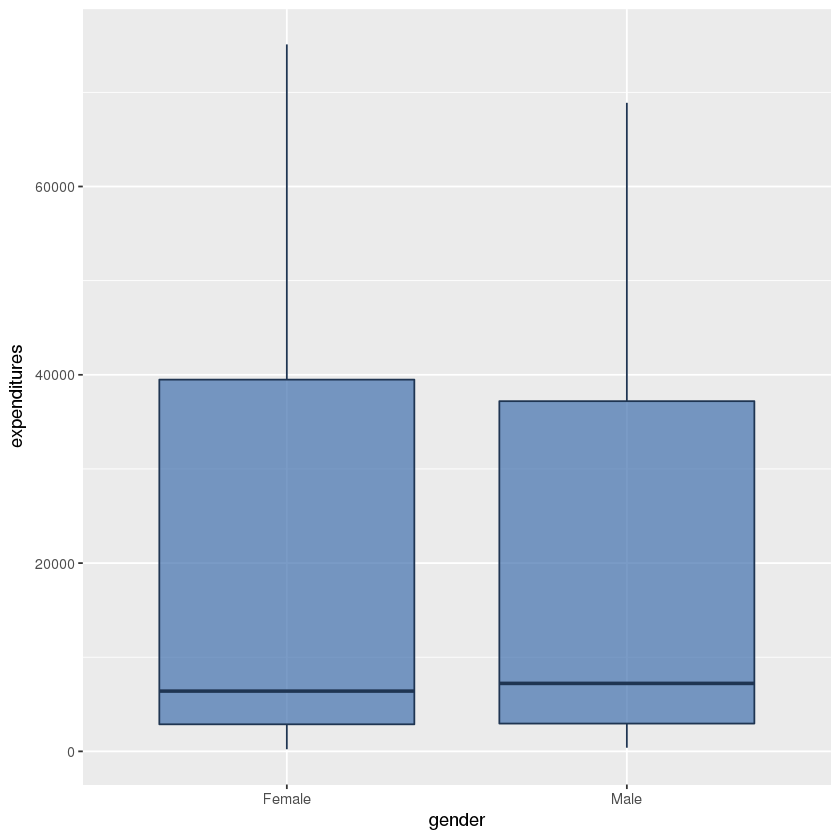

In [26]:
ggplot(data=dds.discr,aes(x=gender, y=expenditures))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

In [41]:
dds.discr %>% 
    group_by(gender) %>%
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

gender,min,max,q1,q3,mean,median
Female,222,75098,2872.5,39487.5,18129.61,6400
Male,386,68890,2954.0,37201.0,18001.20,7219


(b) There isn't significant difference in the distributions. (c) So it does not appear that gender effects expenditure.

### Problem 3

How does the distribution of expenditures vary by ethnic group? Does there seem to be a difference in the amount of funding that a person receives, on average, between different ethnicities?



#### Solution:

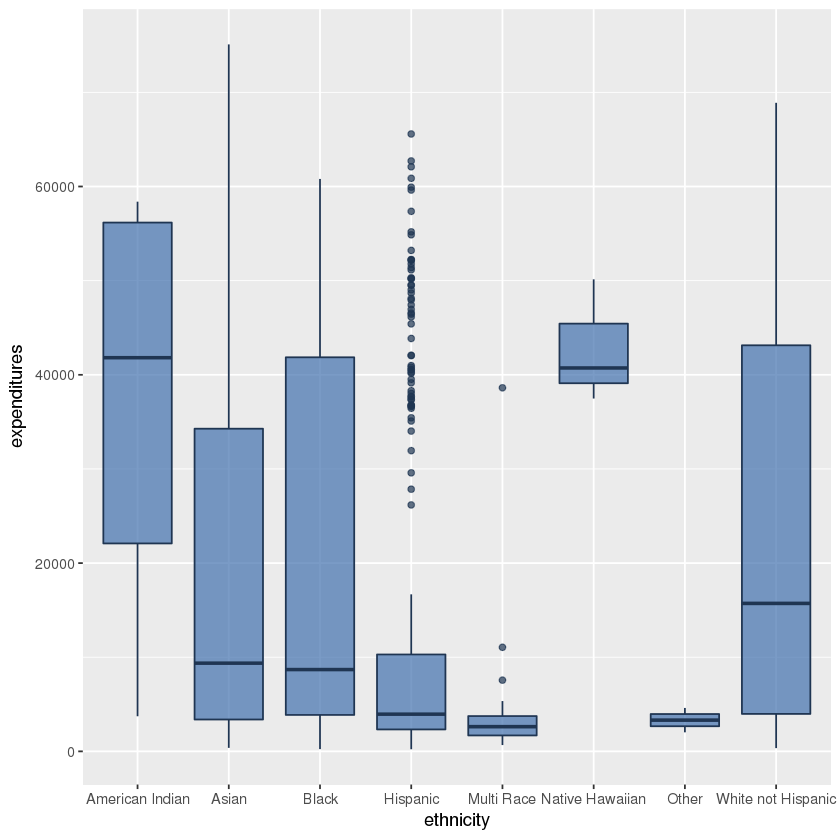

In [39]:
ggplot(data=dds.discr,aes(x=ethnicity, y=expenditures))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

In [40]:
dds.discr %>% 
    group_by(ethnicity) %>%
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

ethnicity,min,max,q1,q3,mean,median
American Indian,3726,58392,22085.25,56170.50,36438.250,41817.5
Asian,374,75098,3382.00,34274.00,18392.372,9369.0
Black,240,60808,3870.00,41857.00,20884.593,8687.0
Hispanic,222,65581,2331.25,10292.50,11065.569,3952.0
Multi Race,669,38619,1689.75,3749.50,4456.731,2622.0
Native Hawaiian,37479,50141,39103.00,45434.00,42782.333,40727.0
Other,2018,4615,2667.25,3965.75,3316.500,3316.5
White not Hispanic,340,68890,3977.00,43134.00,24697.549,15718.0


The distribution of expenditures is quite different between ethnic groups. For example, there is very little variation in expenditures within the Multi Race, Native Hawaiian, and Other groups; in other groups, such as the White not Hispanic group, there is a greater range in expenditures. Additionally, there seems to be a difference in the amount of funding that a person receives, on average, between different ethnicities. The median amount of annual support received for individuals in the American Indian and Native Hawaiian groups is about $\$40,000$, versus medians of approximately $\$10,000$ for Asian and Black consumers.

### Problem 4

Which of the variables could explain discrepencies in the amount of funds people recieve? Do your findings constitute (at least preliminary) evidence for discrimination based on race?

Answer: Both Age and Ethnicity seem to have large effects on the expenditures. This does provide evidence for discrimination based on race, but since there are multiple explanations, more study is needed.

## Epilogue

Next week we will discuss how to untangle multiple explanatory variables.